# 📊 Tip Tahmini için Veri Analizi ve Modelleme

## Bu çalışmada, restoran bahşiş veri seti üzerinde veri analizi, görselleştirme, ön işleme ve modelleme adımları gerçekleştirilmiştir. Aşağıda bu süreçte izlenen adımlar özetlenmiştir:

### 1. 📥 Veri Yükleme ve İnceleme:
Veri Seti: Kaggle üzerindeki The Waiter's Tip data seti kullanıldı. 🍽️

Amaç: Verinin yapısını anlamak için veri seti incelendi ve temel istatistiksel bilgiler gözden geçirildi. 🔍

### 2. 🔧 Veri Ön İşleme:
Kategorik Değişkenlerin Kodlanması:

Label Encoding: sex değişkeni, LabelEncoder kullanılarak erkekler için 1, kadınlar için 0 olacak şekilde kodlandı. 👨‍⚕️👩‍⚕️
One-Hot Encoding: smoker, day, ve time değişkenleri one-hot encoding yöntemiyle binary (ikili) değişkenlere dönüştürüldü. 🚬📅⏰
### 3. 🔍 Keşifsel Veri Analizi (EDA):
Korelasyon Matrisi: Veri setindeki değişkenler arasındaki korelasyonları incelemek için korelasyon matrisi hesaplandı ve heatmap ile görselleştirildi. 🌡️

Veri Görselleştirme: Dağılım grafikleri ve diğer görselleştirmeler ile değişkenler arası ilişkiler analiz edildi. 📈📉

### 4. 🧑‍🔬 Modelleme:
Linear Regression: İlk olarak, temel bir lineer regresyon modeli kurularak bahşiş (tip) tahminleri yapıldı. Modelin performansı MSE ve R² skorları ile değerlendirildi. 📉🔍

Çapraz Doğrulama: Modelin genelleme yeteneğini değerlendirmek için k-fold çapraz doğrulama yapıldı. 🔄

XGBoost: Ek olarak, XGBoost modeli ile tahminler gerçekleştirildi ve Linear Regression modeli ile karşılaştırma yapıldı. 🌟📊

### 5. 📝 Sonuçlar ve Değerlendirme:
Performans Karşılaştırması: Linear Regression ve XGBoost modellerinin performansları karşılaştırıldı, MSE ve R² skorları analiz edildi. ⚖️

İyileştirme Önerileri: Modelin performansını artırmak için ileriye yönelik öneriler sunuldu. 🚀


## Öncelikle gerekli kütüphanelerimizi yüklüyoruz ve import ediyoruz

In [1]:
!pip install researchpy
!pip install xgboost

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import researchpy as rp 
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

  Obtaining dependency information for researchpy from https://files.pythonhosted.org/packages/f2/3a/f89796ede409890a27612c6e27d21bb65763bb7c034cd36d7577abe3edbf/researchpy-0.3.6-py3-none-any.whl.metadata
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/33/35/46c3dcd04bb6813e766ad209ac35ab6fe30d3cb426a6ce47be0b8748a1f5/statsmodels-0.14.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for patsy from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/233.9 kB ? eta -:--:--
   ---------- ----------------------------- 61.4/233.9 kB 1.1 MB/s eta 0:00:01
   ----------------------------- ---------- 174.1/233.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 233.9/233.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df = pd.read_csv('tips.csv')

## Veri Setimize ilk bakışımızı yapıyoruz. Verileri ve verilerin yapısını inceliyoruz.

In [4]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.shape

(244, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## Verilerin birbiri ile olan ilişkilerini ve dağılımlarını inceliyoruz

In [8]:
df.groupby("day")["tip"].sum()

day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

In [9]:
df.groupby("day").agg({"tip": "sum","total_bill":"sum"})

,tip,total_bill
day,,
Fri,51.96,325.88
Sat,260.40,1778.40
Sun,247.39,1627.16
Thur,171.83,1096.33


In [10]:
df.groupby(['day', 'time']).agg({'total_bill': 'sum',"tip": "sum"})

total_bill     tip
day  time                      
Fri  Dinner      235.96   35.28
     Lunch        89.92   16.68
Sat  Dinner     1778.40  260.40
Sun  Dinner     1627.16  247.39
Thur Dinner       18.78    3.00
     Lunch      1077.55  168.83

In [11]:
# Bahşişin genel hesaba oranına bakıyoruz
df["tip/total_bill"]=df["tip"]/df["total_bill"]

In [12]:
df.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip/total_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
5,25.29,4.71,Male,No,Sun,Dinner,4,0.186240
6,8.77,2.00,Male,No,Sun,Dinner,2,0.228050
7,26.88,3.12,Male,No,Sun,Dinner,4,0.116071
8,15.04,1.96,Male,No,Sun,Dinner,2,0.130319
9,14.78,3.23,Male,No,Sun,Dinner,2,0.218539


In [13]:
df[["tip","total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [14]:
df[["tip","total_bill"]].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


In [15]:
rp.summary_cat(df[["sex","smoker","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [16]:
rp.summary_cat(df[["sex","time","day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,time,Dinner,176,72.13
3,,Lunch,68,27.87
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [17]:
rp.summary_cont(df[["total_bill","tip","size"]])

/opt/conda/lib/python3.10/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'total_bill' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/opt/conda/lib/python3.10/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'tip' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix
/opt/conda/lib/python3.10/site-packages/researchpy/summary.py:102: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'size' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table_a.iloc[0,0] = ix


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


## Verileri daha iyi anlamak için verileri görselleştiriyoruz

<Axes: xlabel='sex', ylabel='total_bill'>

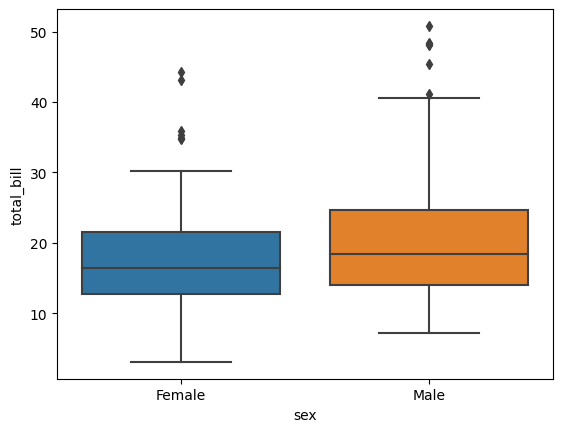

In [18]:
sns.boxplot(x="sex",y="total_bill",data=df)

Cinsiyet Bazında Ortalama Bahşiş Miktarları:
sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64


/tmp/ipykernel_17/3718939607.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, ci=None, palette="Blues_d")


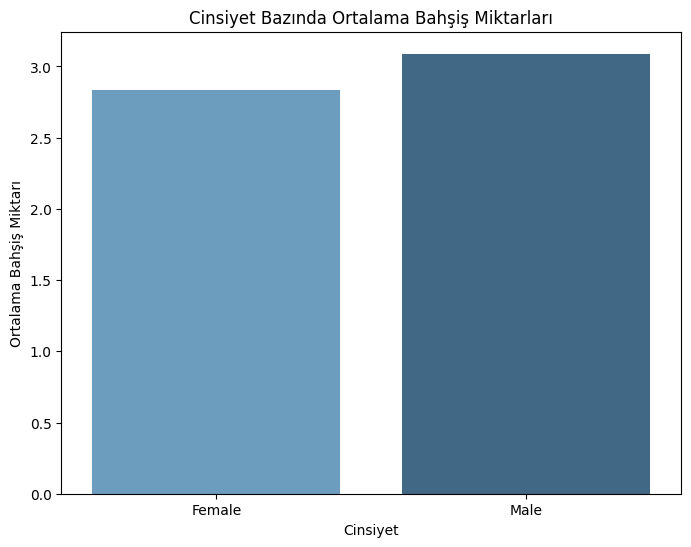

In [19]:
avg_tip_by_sex = df.groupby('sex')['tip'].mean()
print("Cinsiyet Bazında Ortalama Bahşiş Miktarları:")
print(avg_tip_by_sex)

plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='tip', data=df, ci=None, palette="Blues_d")
plt.title('Cinsiyet Bazında Ortalama Bahşiş Miktarları')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Bahşiş Miktarı')
plt.show()

<Axes: xlabel='smoker', ylabel='total_bill'>

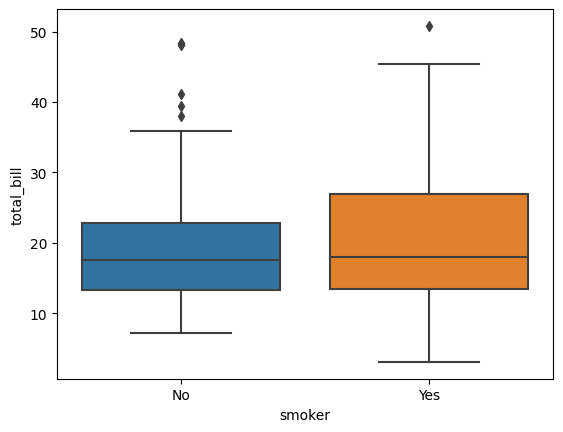

In [20]:
sns.boxplot(x="smoker",y="total_bill",data=df)

<Axes: xlabel='smoker', ylabel='tip'>

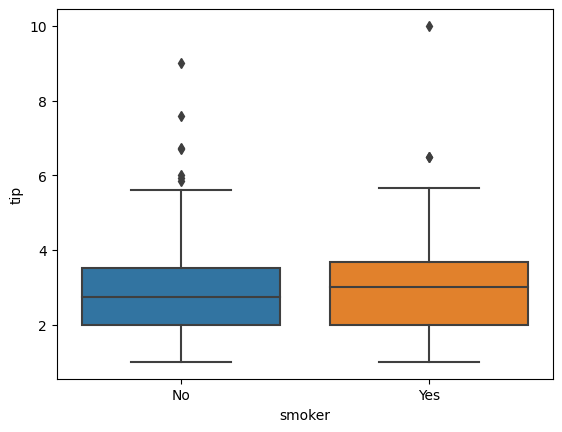

In [21]:
sns.boxplot(x="smoker",y="tip",data=df)

In [22]:
df['tip_percentage']=df['tip/total_bill']*100

In [23]:
avg_tip_percentage_by_smoker = df.groupby('smoker')['tip_percentage'].mean()
print(avg_tip_percentage_by_smoker)

smoker
No     15.932846
Yes    16.319604
Name: tip_percentage, dtype: float64


In [24]:
no_smoker_tips = df[df['smoker'] == 'No']['tip_percentage']
yes_smoker_tips = df[df['smoker'] == 'Yes']['tip_percentage']

t_stat, p_value = stats.ttest_ind(no_smoker_tips, yes_smoker_tips)

print("t-istatistiği:", t_stat)
print("p-değeri:", p_value)

# Sonuçları yorumlayın
alpha = 0.05
if p_value < alpha:
    print("Ortalama bahşiş yüzdeleri arasında anlamlı bir fark var.")
else:
    print("Ortalama bahşiş yüzdeleri arasında anlamlı bir fark yok.")

t-istatistiği: -0.4796693002669833
p-değeri: 0.6318957776878545
Ortalama bahşiş yüzdeleri arasında anlamlı bir fark yok.


<Axes: xlabel='size', ylabel='tip'>

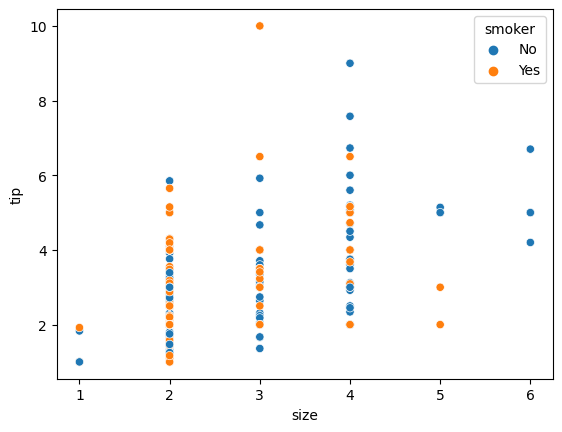

In [25]:
sns.scatterplot(x="size",y="tip",hue="smoker",data=df)

<Axes: xlabel='size', ylabel='tip'>

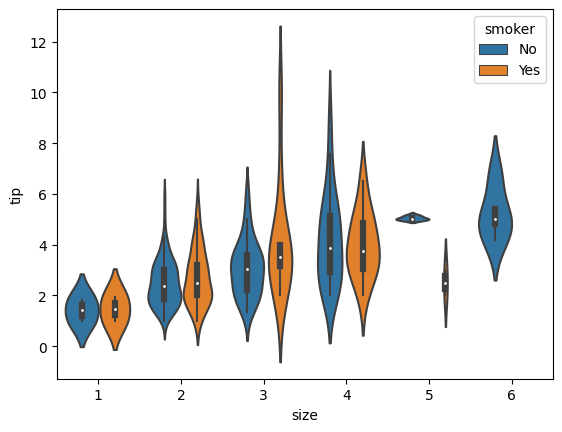

In [26]:
sns.violinplot(x="size",y="tip",hue="smoker",data=df)

<Axes: xlabel='size', ylabel='tip'>

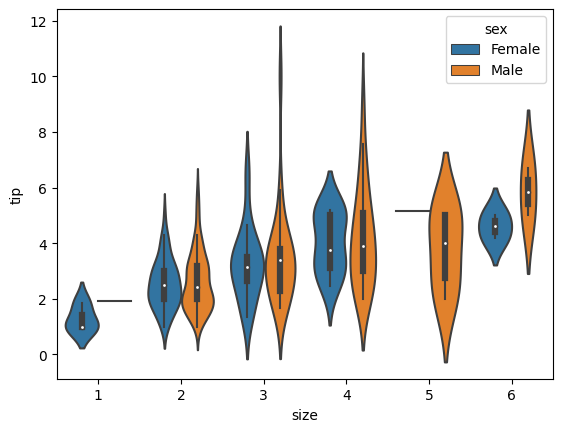

In [27]:
sns.violinplot(x="size",y="tip",hue="sex",data=df)

<Axes: xlabel='day', ylabel='tip'>

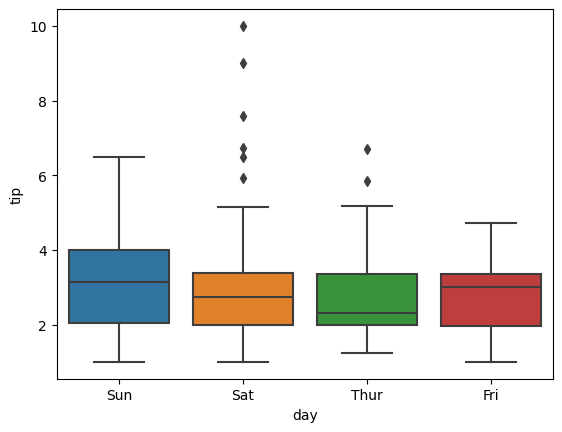

In [28]:
sns.boxplot(x="day",y="tip",data=df)

<Axes: xlabel='day', ylabel='tip'>

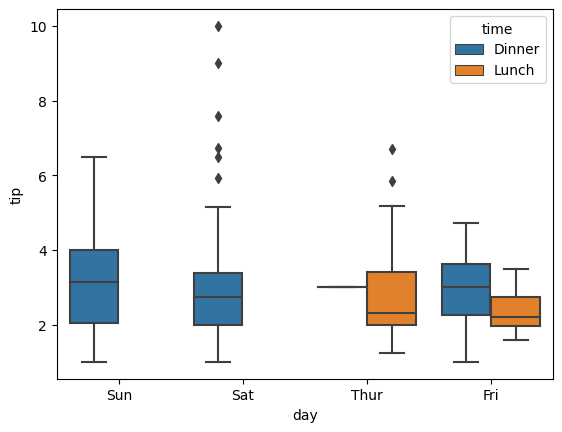

In [29]:
sns.boxplot(x="day",y="tip",hue = "time",data=df)

<Axes: xlabel='day', ylabel='tip'>

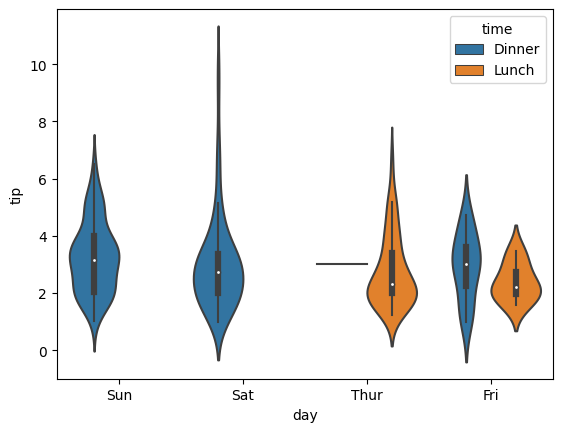

In [30]:
sns.violinplot(x="day",y="tip",hue = "time",data=df)

<Axes: xlabel='day', ylabel='tip'>

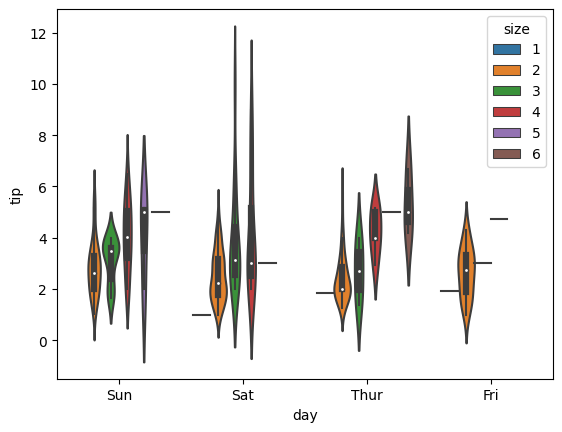

In [31]:
sns.violinplot(x="day",y="tip",hue = "size",data=df)

## Veri Setindeki kategorik değişkenleri modele uygun hale getiriyoruz

In [32]:
label_encoder = LabelEncoder()
# 'sex' sütununu label encoding ile kodla (Male: 1, Female: 0)
df['sex'] = label_encoder.fit_transform(df['sex'])
# 'smoker', 'day' ve 'time' sütunlarını one-hot encoding ile kodla
df = pd.get_dummies(df, columns=['smoker', 'day', 'time'])
print(df)


     total_bill   tip  sex  size  tip/total_bill  tip_percentage  smoker_No  \
0         16.99  1.01    0     2        0.059447        5.944673       True   
1         10.34  1.66    1     3        0.160542       16.054159       True   
2         21.01  3.50    1     3        0.166587       16.658734       True   
3         23.68  3.31    1     2        0.139780       13.978041       True   
4         24.59  3.61    0     4        0.146808       14.680765       True   
..          ...   ...  ...   ...             ...             ...        ...   
239       29.03  5.92    1     3        0.203927       20.392697       True   
240       27.18  2.00    0     2        0.073584        7.358352      False   
241       22.67  2.00    1     2        0.088222        8.822232      False   
242       17.82  1.75    1     2        0.098204        9.820426       True   
243       18.78  3.00    0     2        0.159744       15.974441       True   

     smoker_Yes  day_Fri  day_Sat  day_Sun  day_Thu

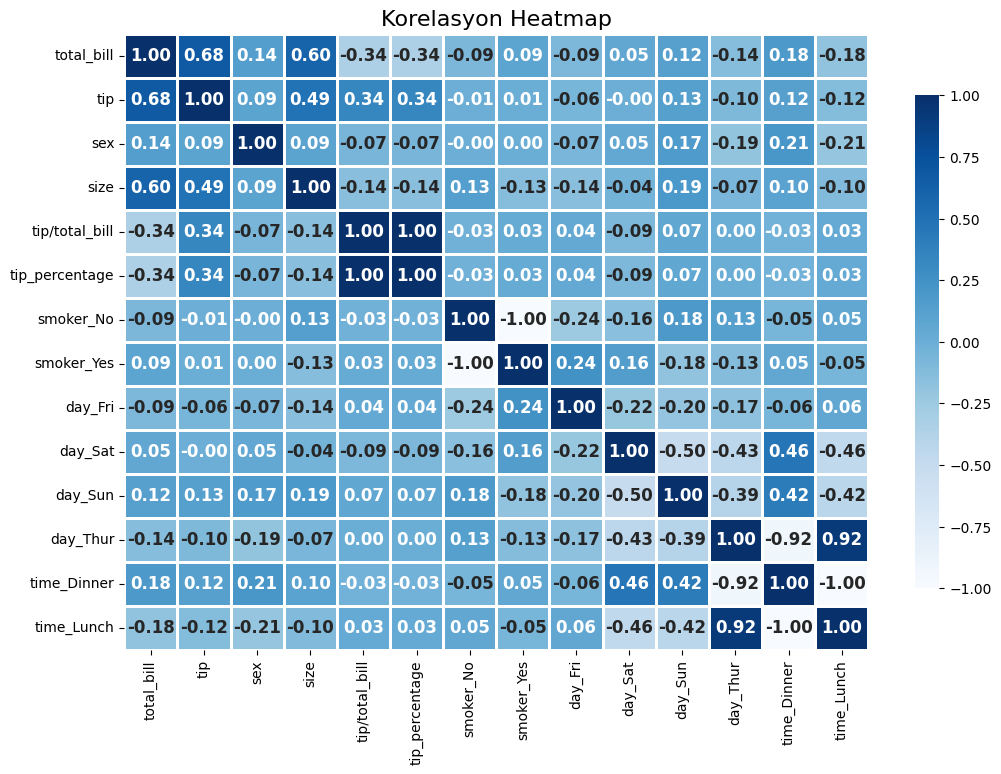

In [33]:
# Verilerin birbirisi ile olan korelasyonunu inceliyoruz
corr = df.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(
    corr,
    cmap="Blues",
    linewidths=1,
    annot=True,
    annot_kws={"size": 12, "weight": 'bold'},  
    fmt=".2f", 
    cbar_kws={"shrink": 0.8}  
)
plt.title('Korelasyon Heatmap', fontsize=16)  
plt.show()

## Model için veri setindeki hedef değerini ayırıyoruz ve "total_bill/tip" tipten türettiğimiz için onu da kaldırıyoruz

In [34]:
y = df['tip']
X = df.drop(columns=['tip','tip/total_bill','tip_percentage'])

# Veri setini %80 train %20 test olacak şekilde ayırıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Linear Regression modelimizi kuruyoruz

In [35]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Linear Regression Modelinin MSE ve R^2 metriklerine göre değerline bakıyoruz

In [36]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.7033566017436109
R^2 Score: 0.4373018194348246


## XGBoost modelini kurup onun da sonuç metriklerini inceliyoruz

In [37]:
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.7943331308794556
R^2 Score: 0.3645189276670223


## XGBoost modelinin özelliklerinin önem değerlerini inceliyoruz

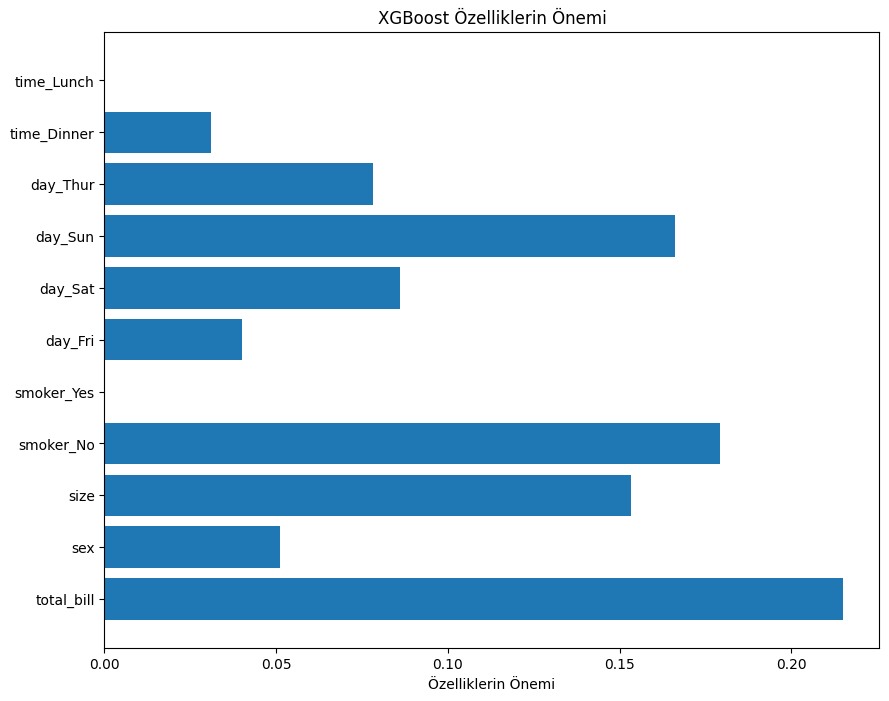

In [38]:
feature_importances = model.feature_importances_

plt.figure(figsize=(10, 8))
plt.barh(X.columns, feature_importances)
plt.xlabel('Özelliklerin Önemi')
plt.title('XGBoost Özelliklerin Önemi')
plt.show()

## Linear Regression'un Çapraz doğrulama ile sonuç metriklerini inceliyoruz 

In [39]:
model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

mean_mse = -cv_scores.mean()  # cross_val_score negatif MSE döner, bu yüzden işareti değiştiriyoruz
std_mse = cv_scores.std()
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE) - Average: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE) - Average: 1.1091673727835532
Standard Deviation of MSE: 0.28626543420423667
R^2 Score: 0.3645189276670223


## En son bir de Ensemble learning (Topluluk Öğrenmesi) örneği ile üç modeli kurup sonuçları inceliyoruz

In [40]:

lin_reg = LinearRegression()
tree_reg = DecisionTreeRegressor(random_state=42)
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)

ensemble_model = VotingRegressor(estimators=[
    ('lr', lin_reg),
    ('dt', tree_reg),
    ('rf', forest_reg)
])

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.7878521036961533
R^2 Score: 0.369703868272111


# 🔍 Veri İncelemesi ve Gözlemler


## Bu veri seti üzerinde yapılan analizler sonucunda elde edilen bazı önemli bulgular aşağıda özetlenmiştir:

### 1. 💸 Bahşiş (Tip) ve Toplam Hesap (Total Bill) İlişkisi:
Korelasyon: Bahşiş miktarı ile toplam hesap arasında pozitif bir korelasyon olduğu gözlemlendi. Yani, toplam hesap arttıkça, müşterilerin bıraktığı bahşiş miktarı da genellikle artmaktadır. Bu, müşteri davranışlarında hesap tutarının bahşiş miktarını etkilediğine dair bir gösterge olabilir. 📈
Grafiksel Analiz: Scatter plot ve regresyon çizgisi kullanılarak, toplam hesap tutarının daha yüksek olduğu durumlarda daha yüksek bahşişlerin bırakıldığı doğrulandı. 📊
### 2. 🚻 Cinsiyet (Sex) ve Bahşiş (Tip) İlişkisi:
Ortalama Bahşiş: Erkeklerin ortalama olarak daha yüksek bahşiş bıraktığı gözlemlendi. Ancak bu farkın istatistiksel olarak anlamlı olup olmadığını belirlemek için daha ayrıntılı bir istatistiksel test yapılması gerekebilir. 👨‍🦰💵👩‍🦰
Grafiksel Analiz: Cinsiyet bazında ortalama bahşiş tutarlarını karşılaştırmak için bar plot kullanıldı ve erkeklerin genellikle daha yüksek bahşiş bıraktığı tespit edildi. 📉
### 3. 📅 Gün (Day) ve Bahşiş İlişkisi:
Hafta Sonu Etkisi: Hafta sonları (Cumartesi ve Pazar), bahşişlerin ortalama olarak daha yüksek olduğu günler olarak tespit edildi. Bu, hafta sonları restoranların daha yoğun olması ve daha büyük grupların yemek yemesiyle ilgili olabilir. 🏖️
Gün Bazında İnceleme: Günlere göre ortalama bahşiş miktarları karşılaştırıldı ve hafta sonu günlerinin öne çıktığı gözlemlendi. 📆
### 4. 🍽️ Öğün (Time) ve Bahşiş İlişkisi:
Öğlen ve Akşam Yemeği: Akşam yemeklerinde genellikle daha yüksek bahşiş bırakıldığı gözlemlendi. Bunun muhtemel sebebi, akşam yemeklerinin daha pahalı ve daha uzun süreli olmasıdır. 🌆🍴
Öğün Bazında İnceleme: Öğlen ve akşam yemeklerinde bırakılan bahşişler karşılaştırıldığında, akşam yemeklerinde ortalama bahşişlerin daha yüksek olduğu görüldü. 🌇
### 5. 👥 Grup Büyüklüğü (Size) ve Bahşiş İlişkisi:
Grup Büyüklüğü: Grup büyüklüğü arttıkça bırakılan bahşişin de arttığı gözlemlendi. Ancak, kişi başına düşen bahşiş miktarının grup büyüklüğü arttıkça azaldığına dair bir eğilim gözlendi. 👨‍👩‍👧‍👦💰
Grup Analizi: Farklı grup büyüklüklerinde ortalama bahşiş miktarları incelendi ve büyük grupların toplamda daha fazla bahşiş bıraktığı, ancak kişi başına düşen bahşişin azaldığı gözlemlendi. 📈📉